# Stock Market Prediction

### Importing required libraries

In [ ]:
#importing pandas and numpy
import numpy as np
import pandas as pd

#importing for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

#importing from sklearn to evaluate models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error



### Reading and loading data

***Here we have considered data of 8 companies and then worked on data analysis and visualizations of both individual and combined data***

In [ ]:
#consider a list to keep tack of all companies
stock_list=[]

In [ ]:
# read each data and append the company name to the dataframe
twitter_data = pd.read_csv("/content/drive/MyDrive/Stocks/twtr.us.txt")
twitter_data["company"]= "Twitter"
stock_list.append("Twitter")
netflix_data = pd.read_csv("/content/drive/MyDrive/Stocks/nflx.us.txt")
netflix_data["company"]= "Netflix"
stock_list.append("Netflix")

snp_data =pd.read_csv("/content/drive/MyDrive/Stocks/snp.us.txt")
snp_data["company"]= "snp"
stock_list.append("snp")

amazon_data =pd.read_csv("/content/drive/MyDrive/Stocks/amzn.us.txt")
amazon_data["company"]= "amazon"
stock_list.append("amazon")

tesla_data =pd.read_csv("/content/drive/MyDrive/Stocks/tsla.us.txt")
tesla_data["company"]= "tesla"
stock_list.append("tesla")

apple_data =pd.read_csv("/content/drive/MyDrive/Stocks/aapl.us.txt")
apple_data["company"]= "apple"
stock_list.append("apple")

microsoft_data =pd.read_csv("/content/drive/MyDrive/Stocks/msft.us.txt")
microsoft_data["company"]= "microsoft"
stock_list.append("microsoft")

walmart_data =pd.read_csv("/content/drive/MyDrive/Stocks/wmt.us.txt")
walmart_data["company"]= "walmart"
stock_list.append("walmart")



Analyse the data

In [ ]:
#Info of each dataframe
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11443 entries, 0 to 11442
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     11443 non-null  object 
 1   Open     11443 non-null  float64
 2   High     11443 non-null  float64
 3   Low      11443 non-null  float64
 4   Close    11443 non-null  float64
 5   Volume   11443 non-null  int64  
 6   OpenInt  11443 non-null  int64  
 7   company  11443 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 715.3+ KB


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1011 non-null   object 
 1   Open     1011 non-null   float64
 2   High     1011 non-null   float64
 3   Low      1011 non-null   float64
 4   Close    1011 non-null   float64
 5   Volume   1011 non-null   int64  
 6   OpenInt  1011 non-null   int64  
 7   company  1011 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 63.3+ KB


In [ ]:
#Merge all the datasets into a single dataset
data = [twitter_data, netflix_data, snp_data, amazon_data,tesla_data,apple_data,microsoft_data,walmart_data]

total_data = pd.concat(data)

In [ ]:
total_data

Date   Open   High    Low  Close     Volume  OpenInt  company
0      2013-11-07  45.10  50.09  44.00  44.90  117673962        0  Twitter
1      2013-11-08  45.93  46.94  40.69  41.65   27921500        0  Twitter
2      2013-11-11  40.50  43.00  39.40  42.90   16113741        0  Twitter
3      2013-11-12  43.66  43.78  41.83  41.90    6316655        0  Twitter
4      2013-11-13  41.03  42.87  40.76  42.60    8682845        0  Twitter
...           ...    ...    ...    ...    ...        ...      ...      ...
11438  2017-11-06  89.42  89.68  88.68  88.70    5255777        0  walmart
11439  2017-11-07  88.87  89.06  88.42  88.95    5346721        0  walmart
11440  2017-11-08  89.11  90.42  89.10  90.26    6766963        0  walmart
11441  2017-11-09  89.94  90.57  89.35  90.30    6903743        0  walmart
11442  2017-11-10  90.24  91.69  90.20  90.92    7646013        0  walmart

[42214 rows x 8 columns]

In [ ]:

#displaying last 100 rows
total_data.tail(100)


Date    Open    High     Low   Close    Volume  OpenInt  company
11343  2017-06-22  75.555  75.585  74.829  75.048   8162202        0  walmart
11344  2017-06-23  75.127  75.306  74.084  74.372  13162021        0  walmart
11345  2017-06-26  74.482  75.455  74.452  75.028   8633130        0  walmart
11346  2017-06-27  75.048  75.893  74.978  75.535   6494854        0  walmart
11347  2017-06-28  75.773  76.320  75.664  76.032   7032730        0  walmart
...           ...     ...     ...     ...     ...       ...      ...      ...
11438  2017-11-06  89.420  89.680  88.680  88.700   5255777        0  walmart
11439  2017-11-07  88.870  89.060  88.420  88.950   5346721        0  walmart
11440  2017-11-08  89.110  90.420  89.100  90.260   6766963        0  walmart
11441  2017-11-09  89.940  90.570  89.350  90.300   6903743        0  walmart
11442  2017-11-10  90.240  91.690  90.200  90.920   7646013        0  walmart

[100 rows x 8 columns]

In [ ]:
#it give the shape(number of rows, number of columns) in a dataframe
total_data.shape

(42214, 8)

## Data Cleaning

In [ ]:
#Describing the data
total_data.describe() 

Open          High           Low         Close        Volume  \
count  42214.000000  42214.000000  42214.000000  42214.000000  4.221400e+04   
mean      51.431148     52.042236     50.786565     51.435983  4.169726e+07   
std      106.341861    107.284995    105.261828    106.324842  6.564227e+07   
min        0.008210      0.008210      0.008210      0.008210  0.000000e+00   
25%        2.250600      2.295200      2.209100      2.254075  5.116202e+06   
50%       22.709500     23.000000     22.482000     22.742000  1.340855e+07   
75%       52.230000     52.958500     51.584500     52.323500  5.836946e+07   
max     1126.100000   1135.540000   1124.060000   1132.880000  2.069770e+09   

       OpenInt  
count  42214.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [ ]:
#Finding missing values
total_data.isnull()


Date   Open   High    Low  Close  Volume  OpenInt  company
0      False  False  False  False  False   False    False    False
1      False  False  False  False  False   False    False    False
2      False  False  False  False  False   False    False    False
3      False  False  False  False  False   False    False    False
4      False  False  False  False  False   False    False    False
...      ...    ...    ...    ...    ...     ...      ...      ...
11438  False  False  False  False  False   False    False    False
11439  False  False  False  False  False   False    False    False
11440  False  False  False  False  False   False    False    False
11441  False  False  False  False  False   False    False    False
11442  False  False  False  False  False   False    False    False

[42214 rows x 8 columns]

In [ ]:
total_data.isnull().any()

Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
company    False
dtype: bool

<Axes: >

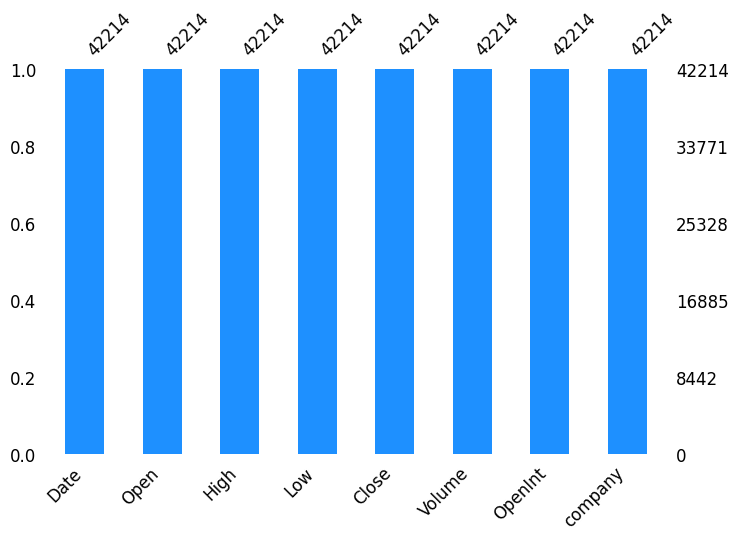

In [ ]:
#visualizing the missing values
msno.bar(total_data, color="dodgerblue", sort="ascending", figsize=(8,5), fontsize=12)


*From the visualization above, it is clear that there no missing values in the dataset.*

In [ ]:
#drop unused columns
total_data.drop('OpenInt',axis=1)

Date   Open   High    Low  Close     Volume  company
0      2013-11-07  45.10  50.09  44.00  44.90  117673962  Twitter
1      2013-11-08  45.93  46.94  40.69  41.65   27921500  Twitter
2      2013-11-11  40.50  43.00  39.40  42.90   16113741  Twitter
3      2013-11-12  43.66  43.78  41.83  41.90    6316655  Twitter
4      2013-11-13  41.03  42.87  40.76  42.60    8682845  Twitter
...           ...    ...    ...    ...    ...        ...      ...
11438  2017-11-06  89.42  89.68  88.68  88.70    5255777  walmart
11439  2017-11-07  88.87  89.06  88.42  88.95    5346721  walmart
11440  2017-11-08  89.11  90.42  89.10  90.26    6766963  walmart
11441  2017-11-09  89.94  90.57  89.35  90.30    6903743  walmart
11442  2017-11-10  90.24  91.69  90.20  90.92    7646013  walmart

[42214 rows x 7 columns]

In [ ]:
#drop any duplicated rows to avoid repitition
total_data = total_data.drop_duplicates()


In [ ]:
total_data.shape

(42214, 8)


> No duplicates found



### Data analysis and visualization


<br />
<br />

comparision of companies --**Twitter, Netflix, Apple, Walmart**  using Candlesticks


In [ ]:
#divide into subplots 
fig = make_subplots(rows=2, cols=2,subplot_titles=("Twitter", "Netflix", "Apple", "Walmart"))

#add each candlestick code
fig.add_trace(go.Candlestick(x=twitter_data["Date"],open=twitter_data["Open"], 
                                        high=twitter_data["High"],
                                        low=twitter_data["Low"], 
                                        close=twitter_data["Close"]), row=1, col=1)

fig.add_trace(go.Candlestick(x=netflix_data["Date"],open=netflix_data["Open"], 
                                        high=netflix_data["High"],
                                        low=netflix_data["Low"], 
                                        close=netflix_data["Close"]), row=1, col=2)
fig.add_trace(go.Candlestick(x=apple_data["Date"],open=apple_data["Open"], 
                                        high=apple_data["High"],
                                        low=apple_data["Low"], 
                                        close=apple_data["Close"]), row=2, col=1)
fig.add_trace(go.Candlestick(x=walmart_data["Date"],open=walmart_data["Open"], 
                                        high=walmart_data["High"],
                                        low=walmart_data["Low"], 
                                        close=walmart_data["Close"]), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Stock market analysis",xaxis1_rangeslider_visible=False,xaxis2_rangeslider_visible=False, xaxis3_rangeslider_visible=False,xaxis4_rangeslider_visible=False)
fig.show()
    
plt.tight_layout()


<Figure size 640x480 with 0 Axes>


<br />
<br />

comparision of closing values in companies --**Microsoft, Netflix, Apple, Tesla**  using bar charts


In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Microsoft", "Netflix", "Apple", "Tesla"))

# Define dark colors
color_microsoft = 'darkblue'
color_netflix = 'darkred'
color_apple = 'darkgreen'
color_tesla = 'darkorange'

# Define a dark color scale
color_scale = [[0, 'darkblue'], [0.2, 'blue'], [0.4, 'darkgreen'], [0.6, 'green'],
              [0.8, 'darkred'], [1, 'red']]

fig.add_trace(go.Bar(name="bar chart", x=microsoft_data["Date"],
                                        y=microsoft_data["Close"] , marker=dict(colorscale=color_scale,color=color_microsoft, line=dict(width=0))), row=1, col=1)

fig.add_trace(go.Bar(name="bar chart", x=netflix_data["Date"],
                                        y=netflix_data["Close"], marker=dict(colorscale=color_scale,color=color_netflix, line=dict(width=0))), row=1, col=2)
fig.add_trace(go.Bar(name="bar chart", x=apple_data["Date"],
                                        y=apple_data["Close"], marker=dict(colorscale=color_scale,color=color_apple, line=dict(width=0))), row=2, col=1)
fig.add_trace(go.Bar(name="bar chart", x=tesla_data["Date"],
                                        y=tesla_data["Close"], marker=dict(colorscale=color_scale,color=color_tesla, line=dict(width=0))), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Stock market analysis on closing values")
fig.show()
    
plt.tight_layout()

<Figure size 640x480 with 0 Axes>


<br />
<br />


comparision of volume  in companies --**Microsoft, Netflix, Apple, Tesla**  using bar charts


In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Microsoft", "Netflix", "Apple", "Tesla"))

# Define dark colors
color_microsoft = 'darkblue'
color_netflix = 'darkred'
color_apple = 'darkgreen'
color_tesla = 'darkorange'

# Define a dark color scale
color_scale = [[0, 'darkblue'], [0.2, 'blue'], [0.4, 'darkgreen'], [0.6, 'green'],
              [0.8, 'darkred'], [1, 'red']]

fig.add_trace(go.Bar(name="bar chart", x=microsoft_data["Date"],
                                        y=microsoft_data["Volume"] , marker=dict(colorscale=color_scale,color=color_microsoft, line=dict(width=0))), row=1, col=1)

fig.add_trace(go.Bar(name="bar chart", x=netflix_data["Date"],
                                        y=netflix_data["Volume"], marker=dict(colorscale=color_scale,color=color_netflix, line=dict(width=0))), row=1, col=2)
fig.add_trace(go.Bar(name="bar chart", x=apple_data["Date"],
                                        y=apple_data["Volume"], marker=dict(colorscale=color_scale,color=color_apple, line=dict(width=0))), row=2, col=1)
fig.add_trace(go.Bar(name="bar chart", x=tesla_data["Date"],
                                        y=tesla_data["Volume"], marker=dict(colorscale=color_scale,color=color_tesla, line=dict(width=0))), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Stock market analysis based on volume")
fig.show()
    
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

## Calculating Daily Return for better analysis



```
closevalue.pct_change()
```
It reurns daily return of the close value.(It returns %)


In [ ]:
#calculated daily return
apple_data["Daily Return"] = apple_data["Close"].pct_change()
tesla_data["Daily Return"] = tesla_data["Close"].pct_change()



<br />
<br />

Daily Return Percentage between  **Apple** and **Tesla**

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=( "Apple", "Tesla"))
# Create subplots with 2 rows and 2 columns

# Add traces for each company's daily return
fig.add_trace(go.Scatter(x=apple_data.index, y=apple_data['Daily Return'],
                    mode='lines+markers',
                    name='Apple'), row=1, col=1)
fig.add_trace(go.Scatter(x=tesla_data.index, y=tesla_data['Daily Return'],
                    mode='lines+markers',
                    name='Tesla'), row=1, col=2)

# Update layout
fig.update_layout(title="Daily Return Percentage between two companies",
                  xaxis_title="index",
                  yaxis_title="Daily Return Percentage")

# Show the plot
fig.show()


<br />
<br />

Converting the total data to pivot data with column names as companies

In [ ]:
total_data['index'] = total_data.index
#converting based on close values
total_data_pivot = total_data.pivot(index='Date', columns='company', values=['Close'])
total_data_pivot = total_data_pivot.reset_index()
#considering columns
total_data_pivot.columns = ['index', 'Twitter', 'Netflix', 'snp','amazon', 'tesla', 'apple', 'microsoft','walmart']
total_data_pivot

index  Twitter  Netflix      snp  amazon  tesla  apple  microsoft  \
0      1972-03-20      NaN      NaN      NaN     NaN    NaN    NaN        NaN   
1      1972-03-22      NaN      NaN      NaN     NaN    NaN    NaN        NaN   
2      1972-03-23      NaN      NaN      NaN     NaN    NaN    NaN        NaN   
3      1972-03-24      NaN      NaN      NaN     NaN    NaN    NaN        NaN   
4      1972-03-27      NaN      NaN      NaN     NaN    NaN    NaN        NaN   
...           ...      ...      ...      ...     ...    ...    ...        ...   
11440  2017-11-06   200.13    19.39  1120.66  173.63  84.47  75.54     302.78   
11441  2017-11-07   195.89    19.66  1123.17  174.18  84.26  76.66     306.05   
11442  2017-11-08   196.44    19.59  1132.88  175.61  84.56  74.84     304.31   
11443  2017-11-09   193.90    19.90  1129.13  175.25  84.09  74.87     302.99   
11444  2017-11-10   192.02    20.32  1125.35  174.67  83.87  74.49     302.99   

        walmart  
0       0.03403  
1       0.03403  
2       0.03403  
3       0.03403  
4       0.04251  
...         ...  
11440  88.70000  
11441  88.95000  
11442  90.26000  
11443  90.30000  
11444  90.92000  

[11445 rows x 9 columns]

In [ ]:
#correlation for close values in stock market
total_pivot_corr= total_data_pivot.corr(),

<ipython-input-23-1b5af9bfd37f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<br />
<br />
Pairplot of close values between all considered companies

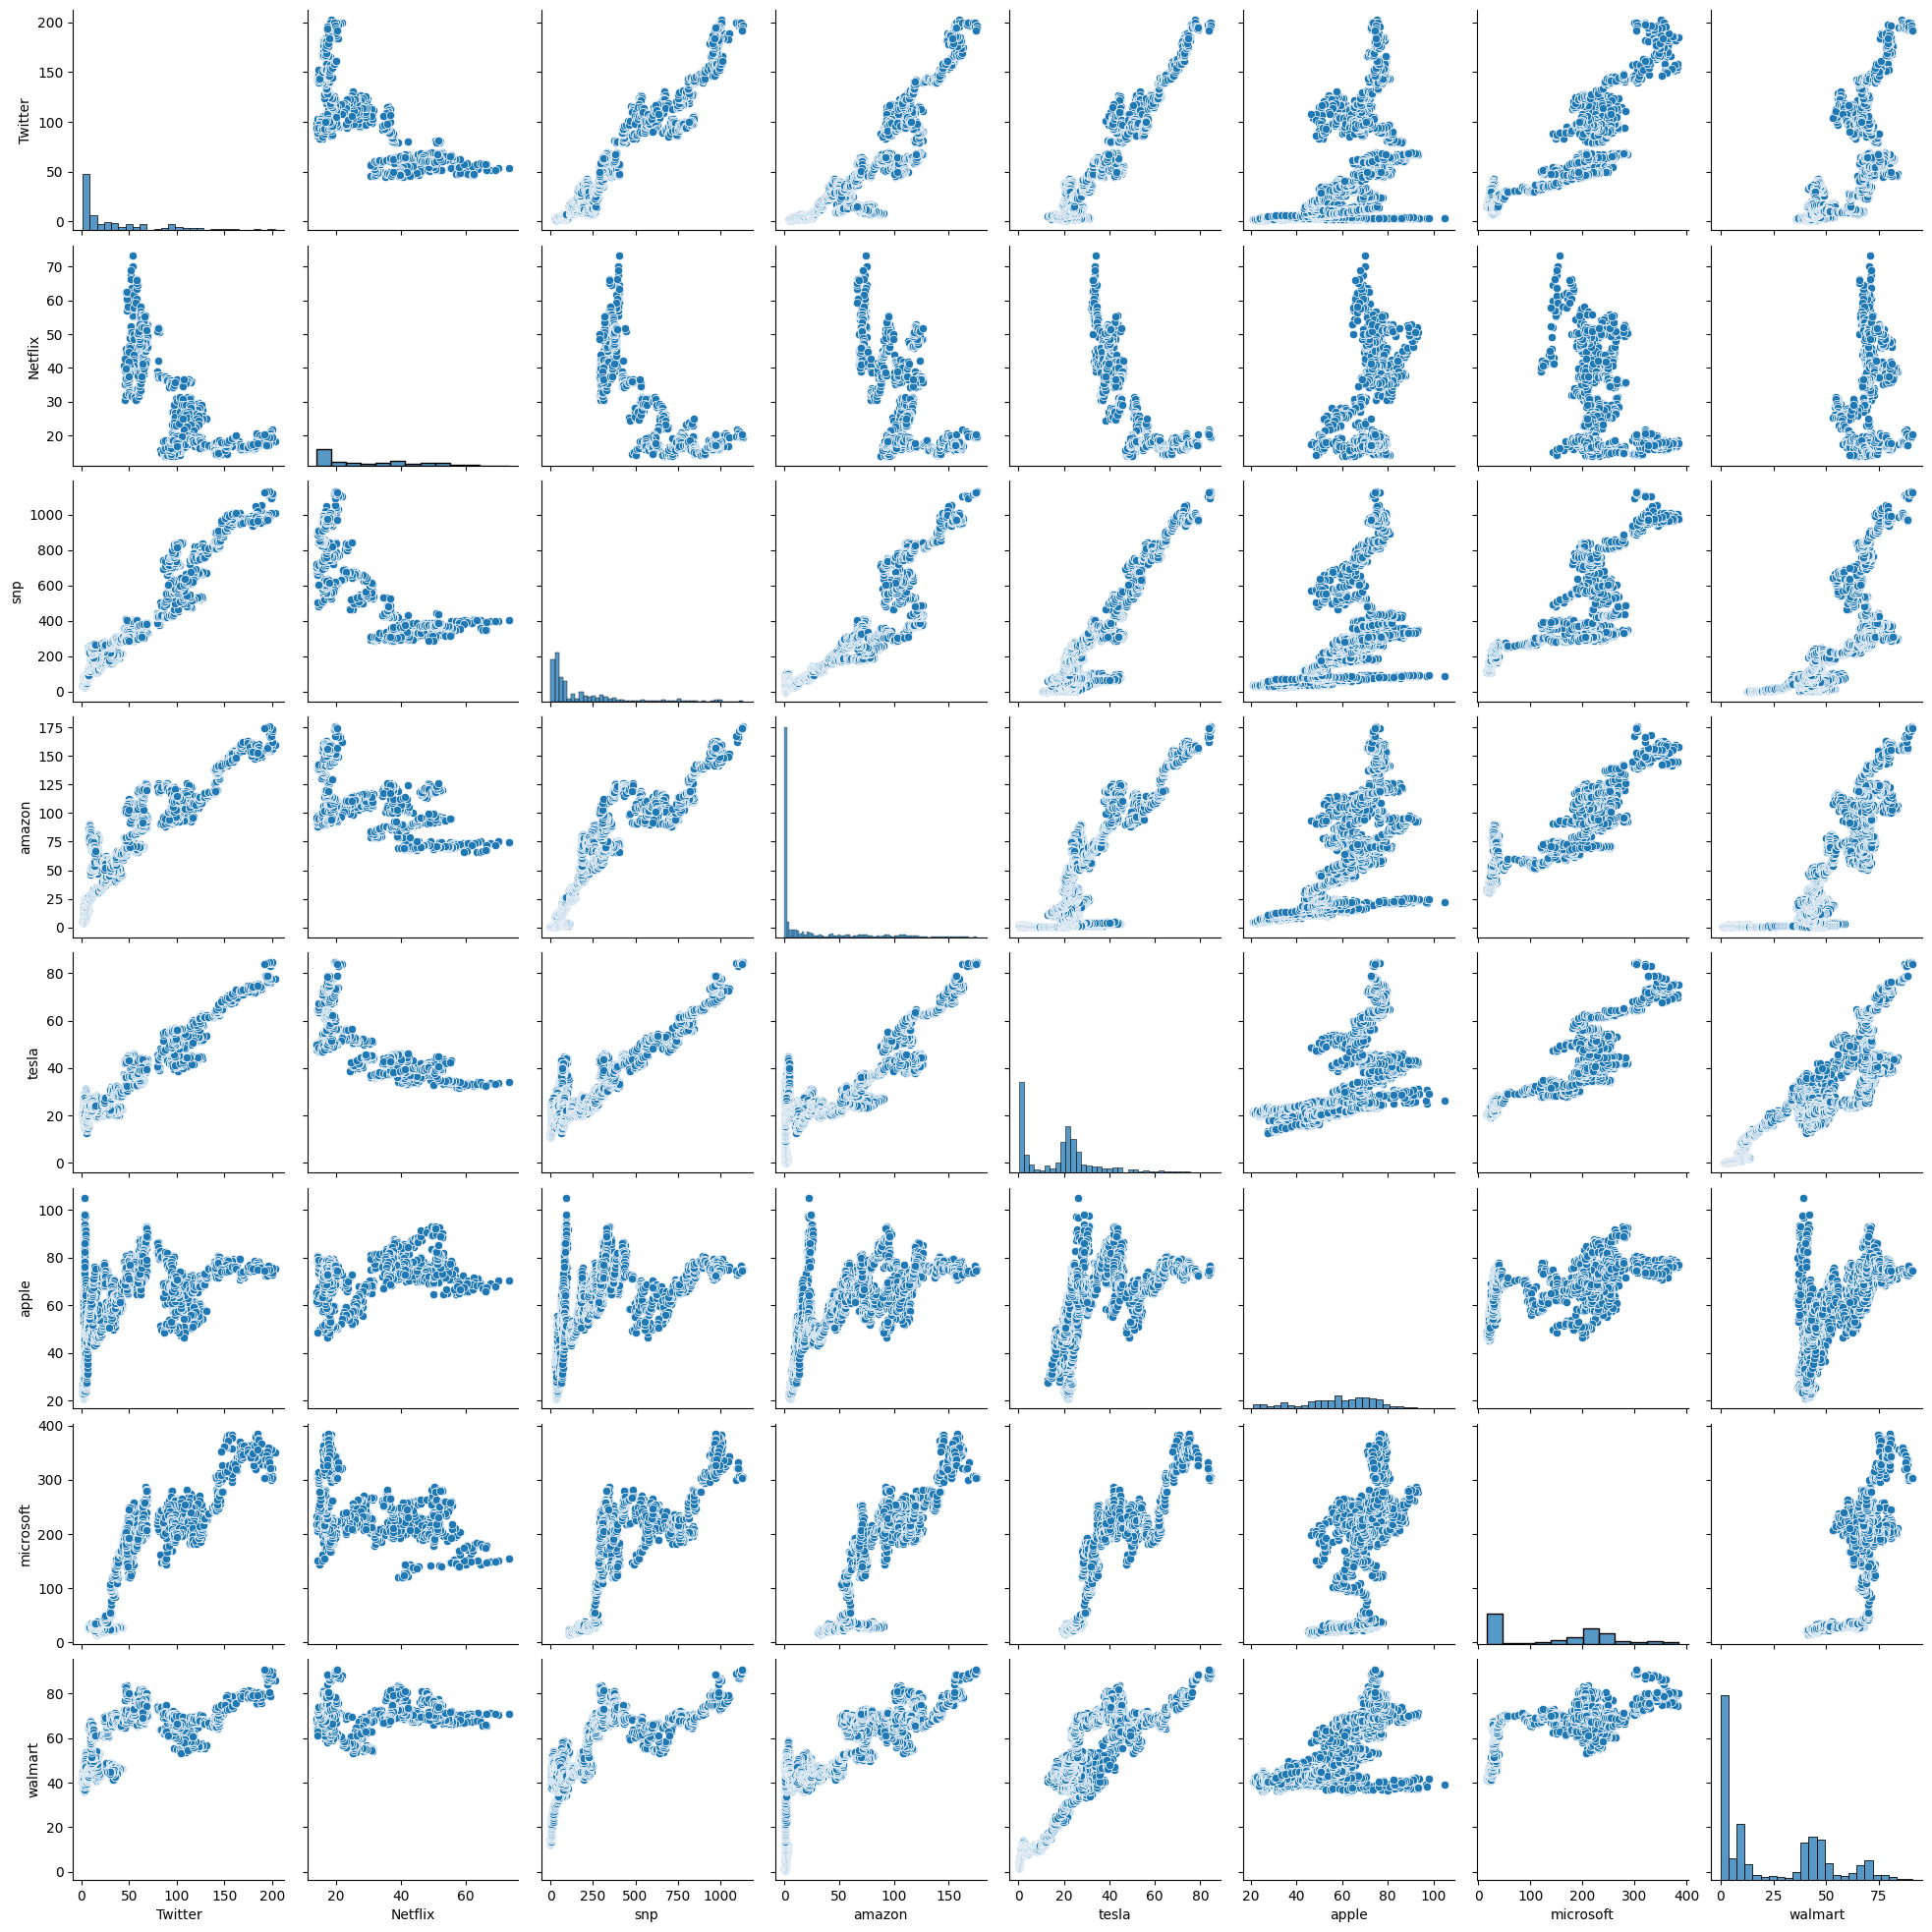

In [ ]:
#Pairplot for close values in stock market

sns.pairplot(total_data_pivot)


In [ ]:
#Calculate pct change for the close values in pivot dataframe
for column in stock_list:
  total_data_pivot[column]= total_data_pivot[column].pct_change()


In [ ]:
total_data_pivot.tail(100)

index   Twitter   Netflix       snp    amazon     tesla     apple  \
11345  2017-06-22 -0.000903  0.020810 -0.000928 -0.001658 -0.000143  0.001622   
11346  2017-06-23  0.020208  0.019284  0.002437  0.004497  0.013522  0.001896   
11347  2017-06-26 -0.003291 -0.011351 -0.009724 -0.003168 -0.009558  0.003903   
11348  2017-06-27 -0.041079 -0.009295 -0.017304 -0.014302 -0.018715 -0.015016   
11349  2017-06-28  0.015758 -0.009382  0.013872  0.014580  0.008527  0.004054   
...           ...       ...       ...       ...       ...       ...       ...   
11440  2017-11-06  0.000600 -0.025628  0.008150  0.010182  0.003922  0.026638   
11441  2017-11-07 -0.021186  0.013925  0.002240  0.003168 -0.002486  0.014827   
11442  2017-11-08  0.002808 -0.003561  0.008645  0.008210  0.003560 -0.023741   
11443  2017-11-09 -0.012930  0.015824 -0.003310 -0.002050 -0.005558  0.000401   
11444  2017-11-10 -0.009696  0.021106 -0.003348 -0.003310 -0.002616 -0.005075   

       microsoft   walmart  
11345   0.016498 -0.009437  
11346   0.002195 -0.009008  
11347  -0.015543  0.008821  
11348  -0.040054  0.006757  
11349   0.024478  0.006580  
...          ...       ...  
11440  -0.010814 -0.010928  
11441   0.010800  0.002818  
11442  -0.005685  0.014727  
11443  -0.004338  0.000443  
11444   0.000000  0.006866  

[100 rows x 9 columns]

In [ ]:
#correlation for data return values in stock market
total_pivot_ret_corr= total_data_pivot.corr(),

<ipython-input-27-6168eec910dc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<br />
<br />

Jointplot -- The joint plot is a way of understanding the relationship between two variables and the distribution of individuals of each variable. 



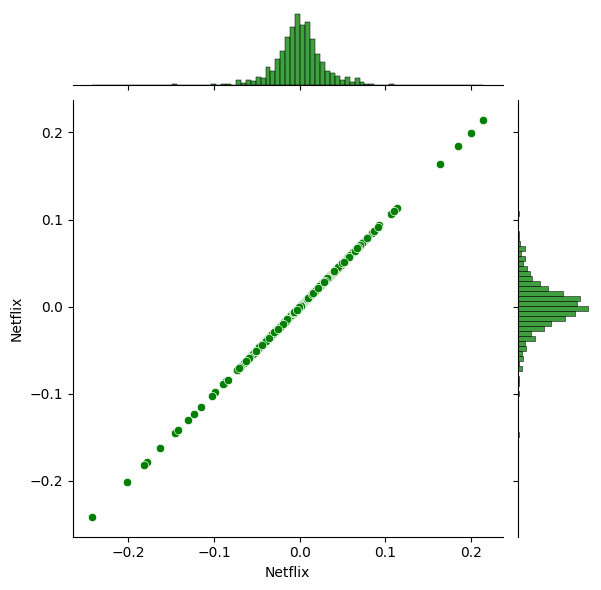

In [ ]:
#Jointplot for data return between same company
sns.jointplot(x='Netflix', y='Netflix', data=total_data_pivot, kind='scatter', color='green')



> This jointplot shows that the correlation is strongrt. (line shows strong correlation) 



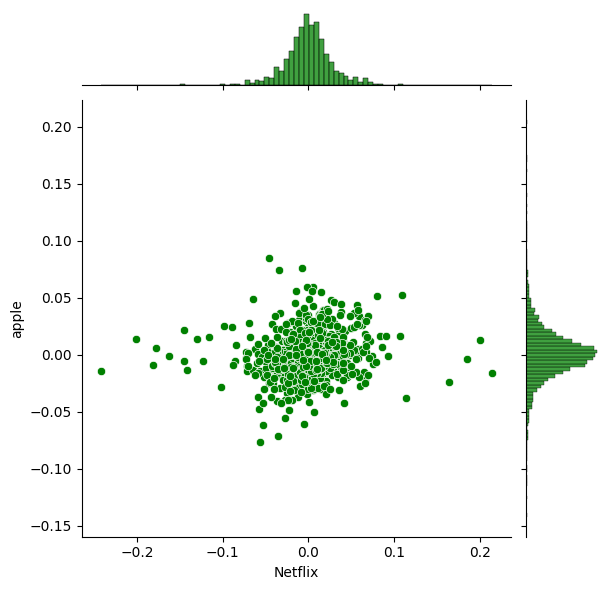

In [ ]:
#Jointplot for data return between different companies

sns.jointplot(x='Netflix', y='apple', data=total_data_pivot, kind='scatter', color='green')


> This jointplot shows that there is no correlation



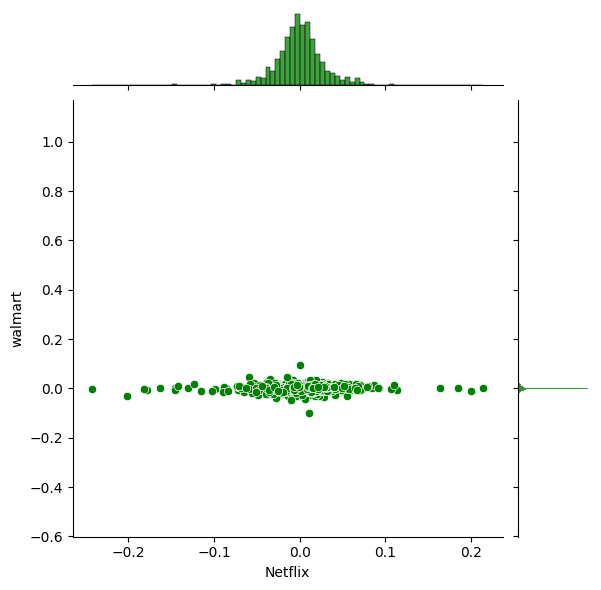

In [ ]:
#Jointplot for data return between different companies

sns.jointplot(x='Netflix', y='walmart', data=total_data_pivot, kind='scatter', color='green')



> This jointplot shows that the correlation is not strong . 



<br />
<br />
Pairplot of data return between companies

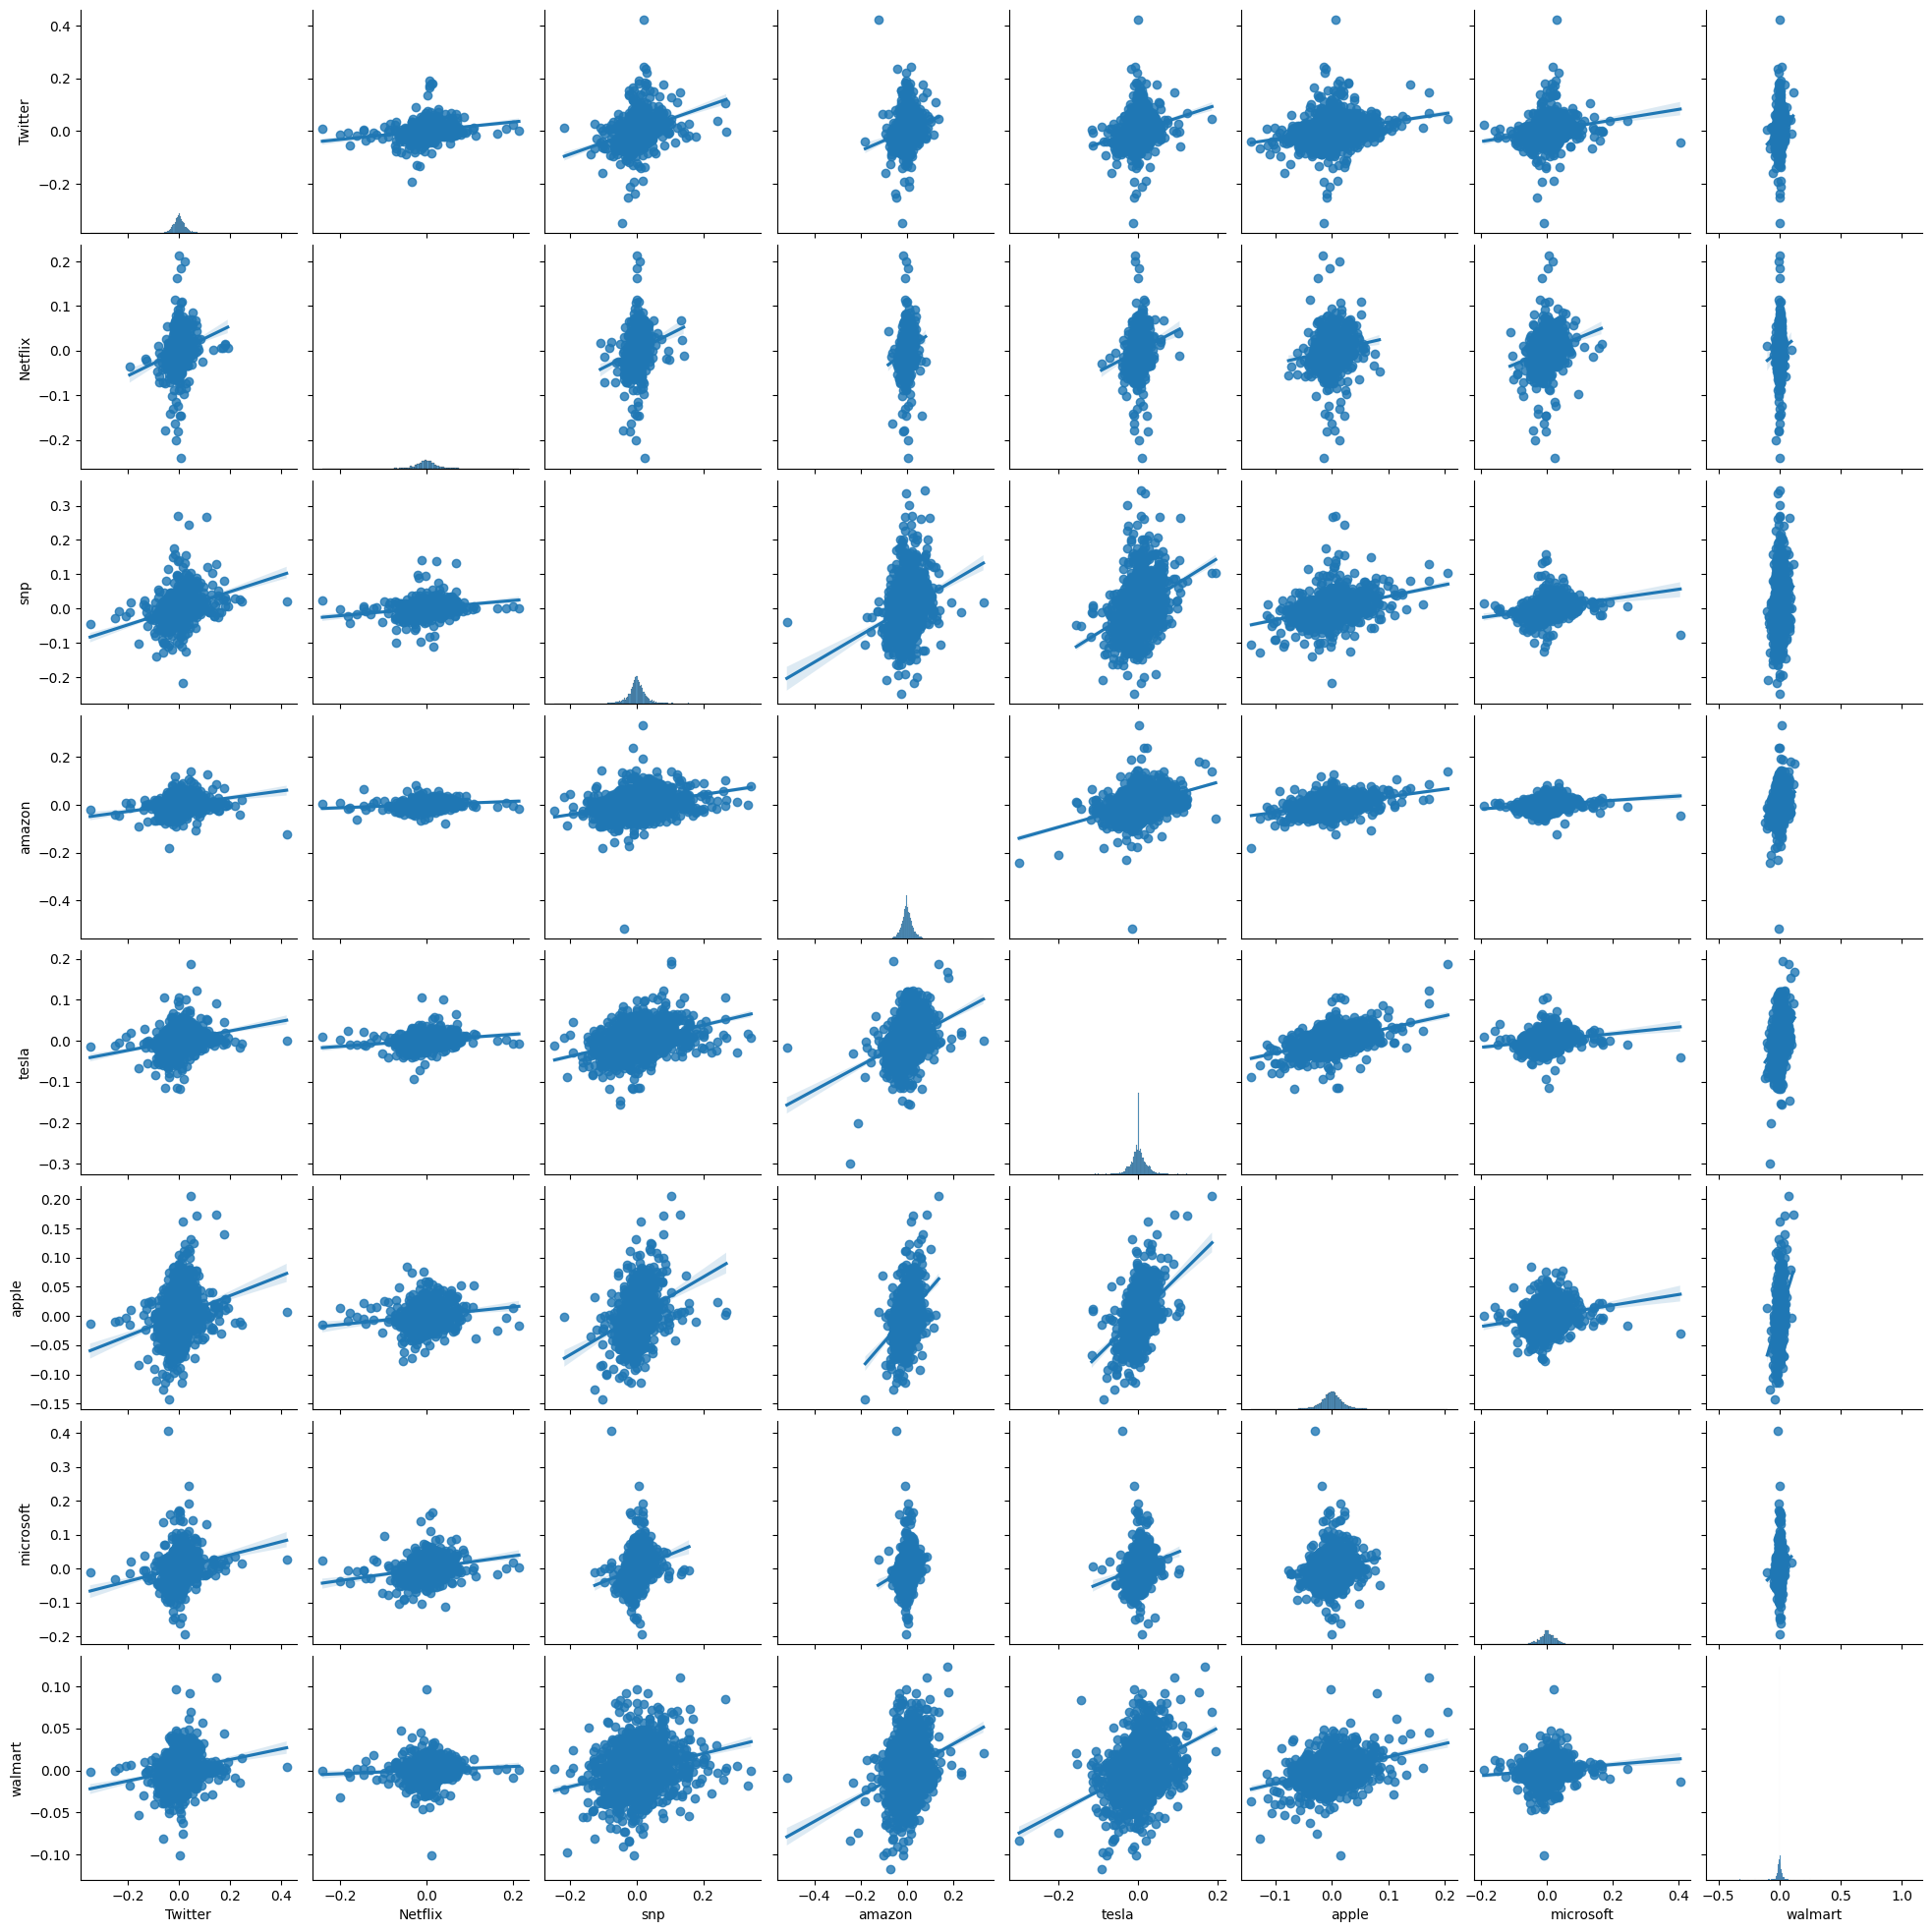

In [ ]:
sns.pairplot(total_data_pivot,kind='reg')

<br />
<br />
Time Series Analysis of all companies using line graph

In [ ]:
#using plotly to depict the line graph of each market of close values
figure = px.line(total_data, x = total_data.index, 
                 y = "Close", color="company",
                 title = "Time Series Analysis (Line Plot)")
figure.show()

 <br />
<br />
Time Series Analysis of twitter company using bar graph

In [ ]:
#using plotly to depict the bar graph of twitter market of close values

figure = px.bar(twitter_data, x = twitter_data.index, 
                y = "Close", color="company", 
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

<br />
<br />
Time Series Analysis of all companies using bar graph in a particular range of data
<br />
<br />


> Make sure to double click on the legend on each company name to see individual analysis



In [ ]:
# Create a bar plot using Plotly Express with pastel colors
figure = px.bar(total_data, x=total_data.index, y="Close", color="company",
                range_x=['2012-01-01', '2015-12-31'],
                title="Time Series Analysis of close values companies between 2012 to 2015  ")

# Update line properties
figure.update_traces(marker_line_width=0.1, 
                     marker_line_color=figure.data[0].marker.color)

# Update layout
figure.update_layout(width=800)

# Show the plot
figure.show()


<br />
<br />
Time Series Analysis of Twitter using line graph in a particular range of data

In [ ]:
figure = px.line(twitter_data, x = twitter_data.index, 
                 y = 'Close', 
                 range_x = ['2012-01-01','2019-12-31'], 
                 title = "Time Series Analysis")
figure.show()

<br />
<br />
Time Series Analysis of all companies using line graph in a particular range of data

In [ ]:
figure = px.line(total_data, x = total_data.index, 
                 y = 'Close', color="company",
                 range_x = ['2012-01-01','2019-12-31'], 
                 title = "Time Series Analysis ")
figure.show()

<br />
<br />
Time Series Analysis of twitter using candlestick chart using a slider

<br/>
<br />


> Try to adjust the slider to see the particular results in that time period



In [ ]:
figure = go.Figure(data = [go.Candlestick(x = twitter_data.index,
                                        open = twitter_data["Open"], 
                                        high = twitter_data["High"],
                                        low = twitter_data["Low"], 
                                        close = twitter_data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
)
figure.show()

<br />
<br />

Heat map for the data

<ipython-input-38-291c441057c6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-38-291c441057c6>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Close      1.000000
Low        0.999050
High       0.998830
Open       0.997673
Volume     0.028405
OpenInt         NaN
Name: Close, dtype: float64


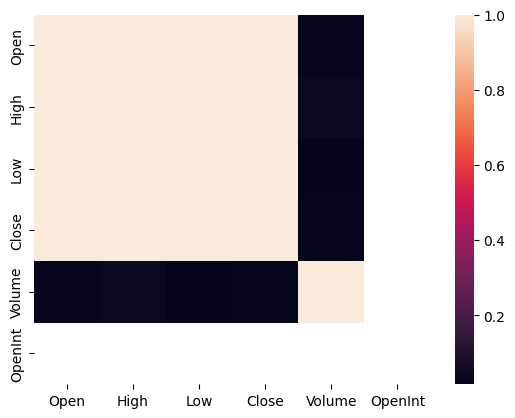

In [ ]:
#correlation for only twitter data
correlation = twitter_data.corr()
print(correlation["Close"].sort_values(ascending=False))
sns.heatmap(twitter_data.corr())
plt.show()

<ipython-input-39-8bd6e5bcfb00>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-39-8bd6e5bcfb00>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Close      1.000000
Low        0.999936
High       0.999936
Open       0.999870
index      0.111138
Volume    -0.175582
OpenInt         NaN
Name: Close, dtype: float64


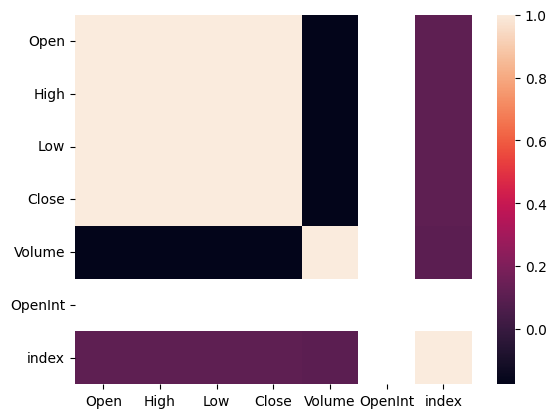

In [ ]:
#correlation for total data
correlation = total_data.corr()
print(correlation["Close"].sort_values(ascending=False))
sns.heatmap(total_data.corr())
plt.show()

Selection of features

Finding the target variable in our case close value and then dividing into training and testing

In [ ]:

x = total_data[["Open", "High", "Low", "Volume"]]
y = total_data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Model training and Evaluation


1.   Linear Regression
2.   Decision Tree Regressor
3.   Long Short Term Memory(LSTM)
4.   AARIMA(ARIMA+LSTM)

Metrics considered- MSE Loss(Mean Squared Error)



 Linear Regression

In [ ]:
# Calucualting the metric - MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

In [ ]:
learner = LinearRegression() #initializing linear regression model
learner.fit(xtrain,ytrain)
y_predict= learner.predict(xtest) #predicting linear regression model
print('Linear Regression MSE Score is {:.5}'.format(mse_loss(y_predict,ytest)))


Linear Regression MSE Score is 0.5087


In [ ]:
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_predict))

# Calculate MAE
mae = mean_absolute_error(ytest, y_predict)

# Print the RMSE and MAE
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))

RMSE: 0.7132
MAE: 0.2737


In [ ]:
score=learner.score(xtest,ytest)#testing the linear regression model
print(score)

0.9999557167454973


DesicionTree Regressor

In [ ]:
model = DecisionTreeRegressor() #initializing DecisionTreeRegressor model
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)#predicting DecisionTreeRegressor model
print('Decision Tree Regression MSE Score is {:.5}'.format(mse_loss(ypred,ytest)))

data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

Decision Tree Regression MSE Score is 1.9388e+08
   Predicted Rate
0         60.2080
1         38.1580
2          1.4012
3        941.0300
4         77.4010


In [ ]:
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, ypred))

# Calculate MAE
mae = mean_absolute_error(ytest, ypred)

# Print the RMSE and MAE
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))

RMSE: 1.2792
MAE: 0.4142


In [ ]:
score=model.score(xtest,ytest)#testing the decision Tree regressor model
print(score)

0.9998575630730479


LSTM

The overall architecture of the model is designed to learn patterns and relationships in time series data, and make predictions based on those patterns. The number of units in each layer, as well as other hyperparameters such as learning rate, batch size, and number of epochs, may need to be tuned during the training process to optimize the model's performance on the specific task at hand.


<br />
<br />


The model summary shows the architecture of a sequential model with two LSTM layers followed by two dense (fully connected) layers

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [ ]:

lstm_model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
33771/33771 [==============================] - 207s 6ms/step - loss: 526.5493
Epoch 2/30
33771/33771 [==============================] - 199s 6ms/step - loss: 449.5237
Epoch 3/30
33771/33771 [==============================] - 198s 6ms/step - loss: 473.2288
Epoch 4/30
33771/33771 [==============================] - 200s 6ms/step - loss: 447.8565
Epoch 5/30
33771/33771 [==============================] - 194s 6ms/step - loss: 385.4945
Epoch 6/30
33771/33771 [==============================] - 193s 6ms/step - loss: 372.4052
Epoch 7/30
33771/33771 [==============================] - 190s 6ms/step - loss: 426.1263
Epoch 8/30
33771/33771 [==============================] - 188s 6ms/step - loss: 418.9922
Epoch 9/30
33771/33771 [==============================] - 189s 6ms/step - loss: 418.6696
Epoch 10/30
33771/33771 [==============================] - 186s 5ms/step - loss: 421.5279
Epoch 11/30
33771/33771 [==============================] - 182s 5ms/step - loss: 375.0334
Epoch 12/30
33771/3

In [ ]:
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
lstm_model.predict(features)

1/1 [==============================] - 1s 947ms/step


array([[184.42769]], dtype=float32)

In [ ]:
# Make LSTM predictions
lstm_forecast = lstm_model.predict(xtest)
lstm_forecast = lstm_forecast.flatten()
lstm_forecast

264/264 [==============================] - 1s 4ms/step


array([58.60531  , 37.834538 ,  3.1512623, ...,  9.051588 ,  5.124614 ,
       21.004137 ], dtype=float32)

In [ ]:
ytest = np.array(ytest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, lstm_forecast))

# Calculate MAE
mae = mean_absolute_error(ytest, lstm_forecast)

# Print the RMSE and MAE
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))

RMSE: 14.0722
MAE: 3.4350


AARIMA - AARIMA is a hybrid approach that combines the strengths of both ARIMA and LSTM models for time series forecasting. 
<br />
<br />
ARIMA - Autoregressive integrated moving average

LSTM - Long Short Term Memory



In [ ]:
# ARIMA modell
arima_model = ARIMA(ytrain, order=(1,2,1))  # Example order: ARIMA(1, 2, 1)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(ytest))
# Combine ARIMA and LSTM forecasts
aarima_forecast = arima_forecast + lstm_forecast


In [ ]:
ytest = np.array(ytest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, arima_forecast))

# Calculate MAE
mae = mean_absolute_error(ytest, arima_forecast)

# Print the RMSE and MAE
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))

RMSE: 116.4519
MAE: 48.2087


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, aarima_forecast))

# Calculate MAE
mae = mean_absolute_error(ytest, aarima_forecast)
# 
# Print the RMSE and MAE
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))

RMSE: 15.8676
MAE: 8.2594


# Summary

In this notebook, you have taken datasets from companies, analysed the datset with visualizations.Later used the machine learning models to evaluate the dataset and caluculate the mean absolute error and root mean squared error